# Exit surveys from employees of: 
Department of Education, Training and Employment (DETE) &
Technical and Further Education (TAFE) institute
(Queensland, Australia)

## The goal:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Data sources

### dete_survey.csv
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

### tafe_survey.csv
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

## Loading data

In [1]:
# !conda install pandas -y
# !pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

print(f"DETE SHAPE: {dete.shape}")
print(dete.dtypes.value_counts())
print('\n')
print(f"TAFE SHAPE: {tafe.shape}")
print(tafe.dtypes.value_counts())


DETE SHAPE: (822, 56)
object    37
bool      18
int64      1
Name: count, dtype: int64


TAFE SHAPE: (702, 72)
object     70
float64     2
Name: count, dtype: int64


In [3]:
dete.head(5)
      


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Notes

- Each datasource has a lot of columns which can equate to a lot of data to get insights
- There's around 800 records
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN
- Many columns are not required for the analysis
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Missing data

In [5]:
null_counts = dete.isnull().sum()[dete.isnull().sum() > 0]
null_sorted = null_counts.sort_values(ascending=False)
null_counts_df = pd.DataFrame(null_sorted).reset_index()
null_counts_df.columns = ['Column', 'Missing Values']

null_counts_df

,Column,Missing Values
0,Torres Strait,819
1,South Sea,815
2,Aboriginal,806
3,Disability,799
4,NESB,790
5,Business Unit,696
6,Classification,367
7,Opportunities for promotion,87
8,Career Aspirations,76
9,Wellness programs,56


In [6]:
null_counts = tafe.isnull().sum()[tafe.isnull().sum() > 0]
null_sorted = null_counts.sort_values(ascending=False)
null_counts_df = pd.DataFrame(null_sorted).reset_index()
null_counts_df.columns = ['Column', 'Missing Values']

null_counts_df

,Column,Missing Values
0,Main Factor. Which of these was the main facto...,589
1,InductionInfo. Topic:Did you undertake a Corpo...,270
2,Contributing Factors. Job Dissatisfaction,265
3,Contributing Factors. NONE,265
4,Contributing Factors. Other,265
...,...,...
64,InstituteViews. Topic:7. Management was genera...,88
65,InstituteViews. Topic:5. I felt the salary for...,87
66,Induction. Did you undertake Workplace Induction?,83
67,CESSATION YEAR,7


In [7]:
# set values as NaN
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [8]:
#droping columns non relevent to the goal

dete_drop_cols = dete.columns[28:49]
tafe_drop_cols = tafe.columns[17:66]

dete.drop(dete_drop_cols, axis=1, inplace=True)
tafe.drop(tafe_drop_cols, axis=1, inplace=True)


## Cleaning column names

We want to join both data sets so we will performing some cleaning on both datasets so that the column names are the same:<br>
For example:<br>
 - In dete: Cease Date -> cease_date<br>
 - In tafe: CESSATION YEAR -> cease_date

In [9]:
dete.columns = dete.columns.str.lower().str.strip().str.replace(' ','_')

tafe_renaming = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe.rename(columns=tafe_renaming, inplace=True)


In [10]:
dete.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
tafe.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## COLUMNS

Our analysis is about Resignations.<br>
If we look at the 'separationtype' column we can see that there are different elements. We only require those that are 'resigned'

In [12]:
dete['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [13]:
tafe['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In the case of the dete dataset we need to select different options whilst for the tafe dataset it seems it only has one unique answer related with resignation.

In [14]:
pattern = r'resignation'

filter = dete['separationtype'].str.lower().str.contains(pattern, regex=True) == True

dete = dete[filter]

dete['separationtype'].value_counts()

separationtype
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: count, dtype: int64

In [15]:
filter = tafe['separationtype'].str.lower().str.contains(pattern, regex=True) == True

tafe = tafe[filter]

tafe['separationtype'].value_counts()

separationtype
Resignation    340
Name: count, dtype: int64

## Verifying data

Let's check our data for any major inconsistencies

### Checking cease_date and date_start_date

- dete_start_date should be before cease_date, let check if all is in order
- dete_start_date should be after 1940

In [16]:
# Lets filter the date to avoid those that haven't stated their start date and convert it
filter  = dete['dete_start_date'] != 'Not Stated'

dete = dete[filter]

dete['dete_start_date'].dtype

dtype('float64')

In [17]:
# lets extract the year from the variable
pattern = r'(\d{4})'

dete['cease_date'] = dete['cease_date'].str.extract(pattern).astype(float)

In [18]:
dete['cease_date'].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [19]:
dete['dete_start_date'].value_counts()

dete_start_date
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: count, dtype: int64

In [20]:
tafe['cease_date'].value_counts()

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64

Let's see the box plots of the pevious columns

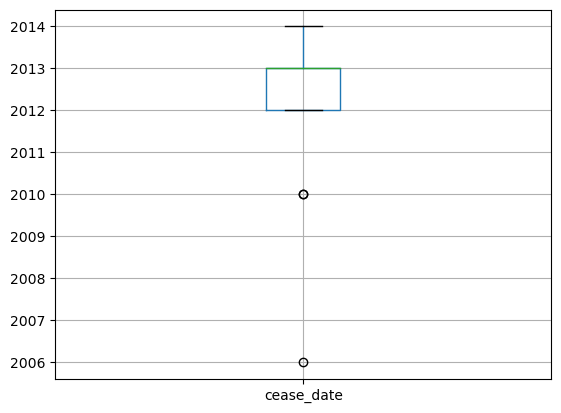

In [21]:
dete.boxplot(column='cease_date')
plt.show()

In [22]:
tafe.boxplot(column='cease_date')

<Axes: >

In [23]:
tafe['cease_date'][tafe['cease_date'] < 2010]

8     2009.0
63    2009.0
Name: cease_date, dtype: float64

We have some outliers for the cease_date column

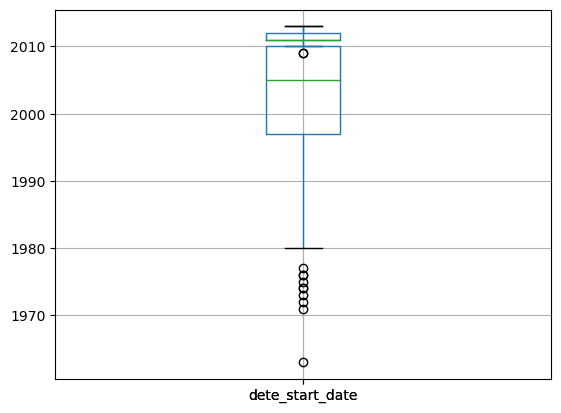

In [24]:
dete.boxplot(column='dete_start_date')
plt.show()

The tenure of the employees that resigned looks, skewed. It's median being around 2006. We have some outliers for people with long tenures.

### Years of service

tafe df has the column 'institute_service'. We need to create one for the dete df.

In [25]:
tafe['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

In [26]:
def inst_serv(cease_date, start_date):
    service = cease_date - start_date

    if service < 1:
        return 'Less than 1 year'
    elif service < 3:
        return '1-2'
    elif service < 5:
        return '3-4'
    elif service < 7:
        return '5-6'
    elif service < 11:
        return '7-10'
    elif service < 21:
        return '11-20'
    else:
        return 'More than 20 years'
    
dete['institute_service'] = dete.apply(lambda row: inst_serv(row['cease_date'], row['dete_start_date']), axis=1)


In [27]:
dete['institute_service'].value_counts()


institute_service
More than 20 years    81
11-20                 57
7-10                  41
5-6                   40
3-4                   36
1-2                   36
Less than 1 year      20
Name: count, dtype: int64

We created the function: inst_serv() to create the column 'institute service' for the dete df

### Identifying dissatisfied employees

In each dataframe we will use the following columns to identify dissatisfaction: 


In [28]:
tafe_columns = [

'Contributing Factors. Dissatisfaction',
'Contributing Factors. Job Dissatisfaction'
]

dete_colums = [
'job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload'
]

In [29]:
tafe['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [30]:
tafe['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)


Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

We need to convert the values of the columns to True, False or NaN

In [31]:
def update_values(row):
    if row == '-':
        return False
    elif pd.isna(row):
        return np.nan
    else:
        return True

In [32]:
tafe['Contributing Factors. Dissatisfaction'] = tafe['Contributing Factors. Dissatisfaction'].map(update_values)
tafe['Contributing Factors. Job Dissatisfaction'] = tafe['Contributing Factors. Job Dissatisfaction'].map(update_values)



In [33]:
tafe['Contributing Factors. Job Dissatisfaction'].unique()

array([False, True, nan], dtype=object)

In [34]:
tafe['Contributing Factors. Dissatisfaction'].unique()

array([False, True, nan], dtype=object)

Now the columns in tafe are ready, now we need to fix the ones for dete

In [38]:
dete[dete_colums].value_counts(dropna=False)

job_dissatisfaction  dissatisfaction_with_the_department  physical_work_environment  lack_of_recognition  lack_of_job_security  work_location  employment_conditions  work_life_balance  workload
False                False                                False                      False                False                 False          False                  False              False       162
                                                                                                                                                                      True               False        39
                                                                                                                                True           False                  False              False         8
                                                                                     True                 False                 False          False                  False              False         8
Tr

It looks like for dete all columns are clear to go

#### Create the 'dissatisfied' column in the dfs

### Combining the data